Importing libraires and dataset

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import nltk 

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from xgboost import XGBRFClassifier


In [177]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [178]:
dataset = pd.read_csv('rreviews.tsv', sep='\t')

In [179]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Exploration

In [180]:
dataset.shape

(1000, 2)

In [181]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [182]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [183]:
dataset.describe()

,Liked
count,1000.000000
mean,0.501000
std,0.500249
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


Working with missing data

In [184]:
dataset.isnull().values.any()

False

Countplot

C:\Users\emman\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Liked', ylabel='count'>

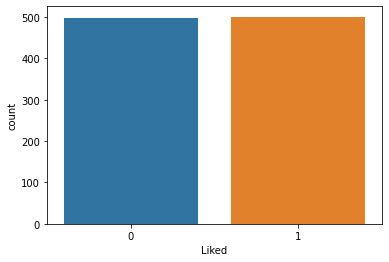

In [185]:
sns.countplot(dataset['Liked'])

In [186]:
p = (dataset.Liked ==1).sum()
print("Positive reviews: {}".format(p))

n = (dataset.Liked ==0).sum()
print("Negative reviews: {}".format(n))

Positive reviews: 501
Negative reviews: 499


Lenght of reviews

In [187]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [188]:
dataset['Length'] = dataset['Review'].apply(len)

In [189]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<AxesSubplot:ylabel='Frequency'>

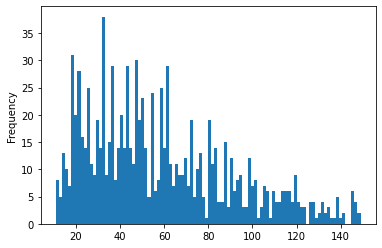

In [190]:
#Histogram
dataset['Length'].plot(bins=100, kind='hist')

In [191]:
dataset.Length.describe()

count    1000.000000
mean       58.309000
std        32.368089
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [192]:
#Lmsg
dataset[dataset['Length']== 149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [193]:
#Smsg
dataset[dataset['Length']== 11]['Review'].iloc[0]

'DELICIOUS!!'

In [194]:
positive = dataset[dataset['Liked']== 1]

In [195]:
negative = dataset[dataset['Liked']== 0]

In [196]:
positive

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14
...,...,...,...
899,"Overall, a great experience.",1,28
901,Their regular toasted bread was equally satisf...,1,97
907,The chips and sals a here is amazing!!!!!!!!!!...,1,55
909,This is my new fav Vegas buffet spot.,1,37


In [197]:
negative

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


Cleaning the text

In [198]:
corpus = []

for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    
    review = [ps.stem(word ) for word in review if not word in set (all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
    

In [ ]:
print(corpus)

Bag of words

In [200]:
cv = CountVectorizer(max_features=1500)

In [201]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [202]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1]

In [203]:
x.shape

(1000, 1500)

In [204]:
y.shape

(1000,)

Splitting the dataset

In [205]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [206]:
x_train.shape

(800, 1500)

In [207]:
y_train.shape

(800,)

In [208]:
x_test.shape

(200, 1500)

In [209]:
y_test.shape

(200,)

Build model

1 - Naive bayes

In [210]:
classifes_nb = GaussianNB()
classifes_nb.fit(x_train,y_train)

GaussianNB()

In [211]:
y_pred = classifes_nb.predict(x_test)

In [212]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy percent: {}%".format(acc*100))

Accuracy percent: 70.0%


In [213]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[58 49]
 [11 82]]


2 - XGBoost classifier

In [ ]:
classifes_xgb = XGBRFClassifier()
classifes_xgb.fit(x_train,y_train)

In [215]:
y_pred = classifes_xgb.predict(x_test)

In [216]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy percent: {}%".format(acc*100))

Accuracy percent: 71.0%


In [217]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[105   2]
 [ 56  37]]


Final model - XGBoost classifier

In [ ]:
classifes = XGBRFClassifier()
classifes.fit(x_train,y_train)

In [219]:
y_pred = classifes.predict(x_test)

In [220]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy percent: {}%".format(acc*100))

Accuracy percent: 71.0%


In [221]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[105   2]
 [ 56  37]]
